In [ ]:
import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
data, image_data = preprocessing.preprocess()

In [ ]:
likelihood_dir = 'online_likelihood.csv'
like_data = pd.read_csv(likelihood_dir)

# print(like_data)
like_data['categ1_ave']
for i in range(1,101):
    data.loc[data['imgseq']==i,'correct_image'] = like_data.loc[like_data['im_number']==i,'categ1_ave'].values[0]
    data.loc[data['imgseq']==i,'false_image'] = like_data.loc[like_data['im_number']==i,'categ2_ave'].values[0]
    
# print(like_data.loc[like_data['im_number']==1,'categ1_ave'].values[0])
    
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

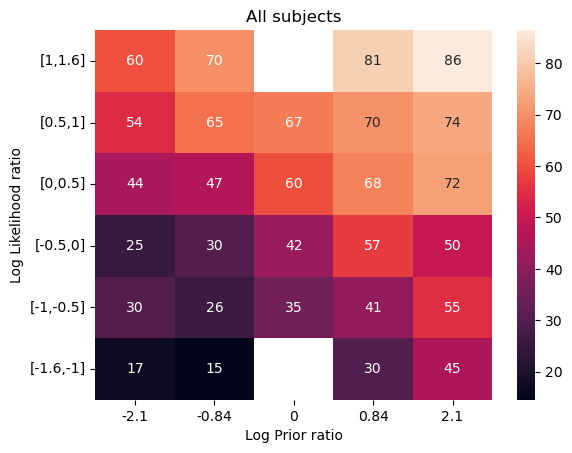

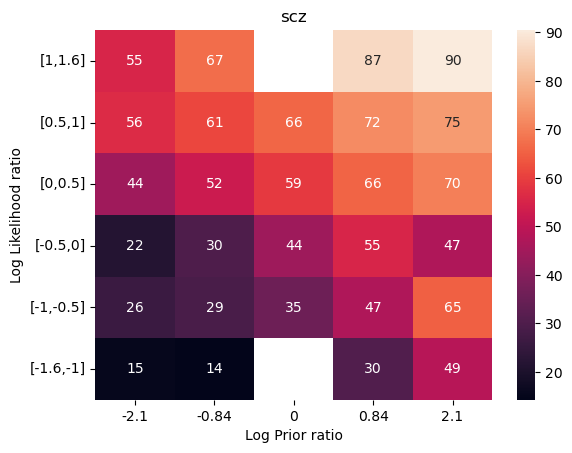

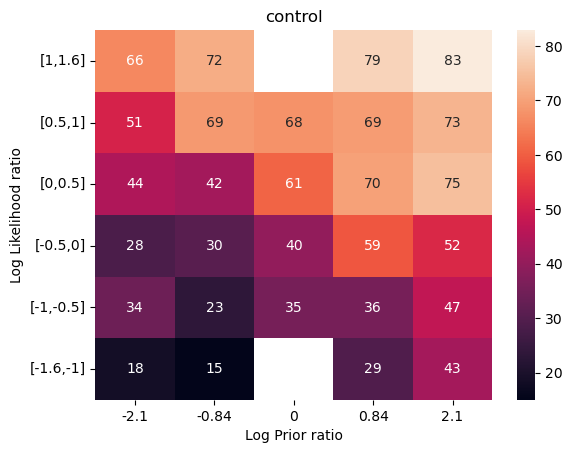

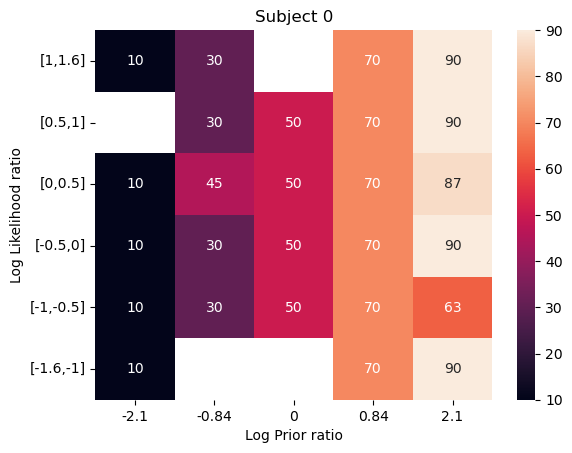

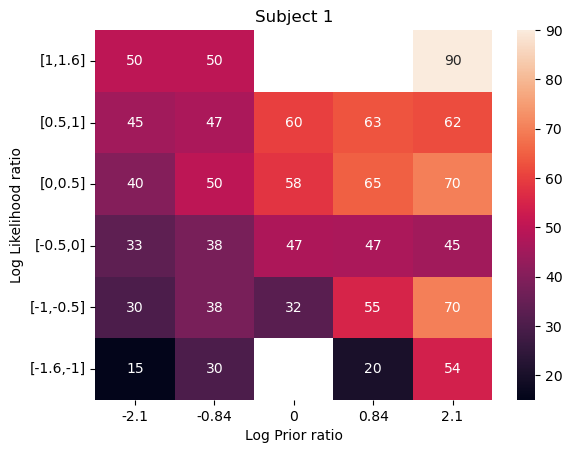

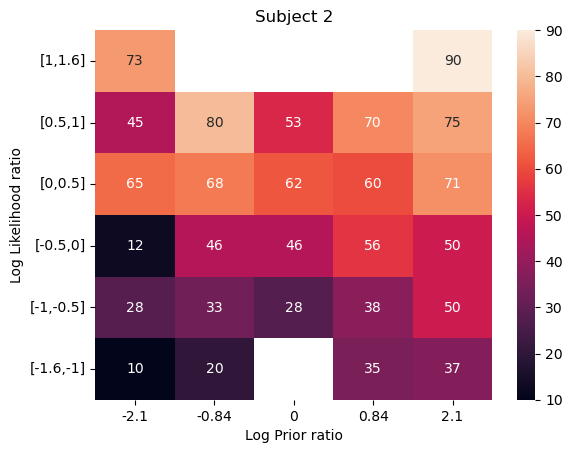

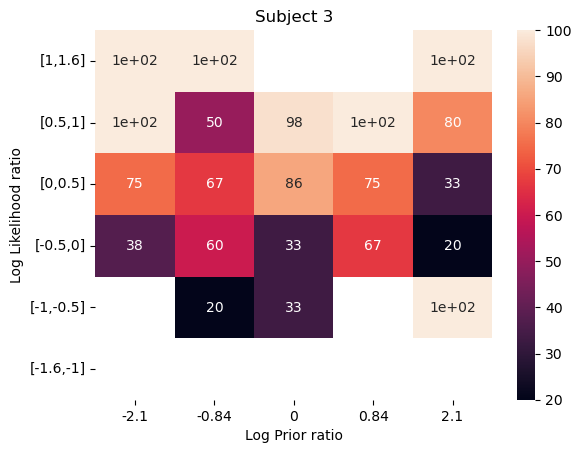

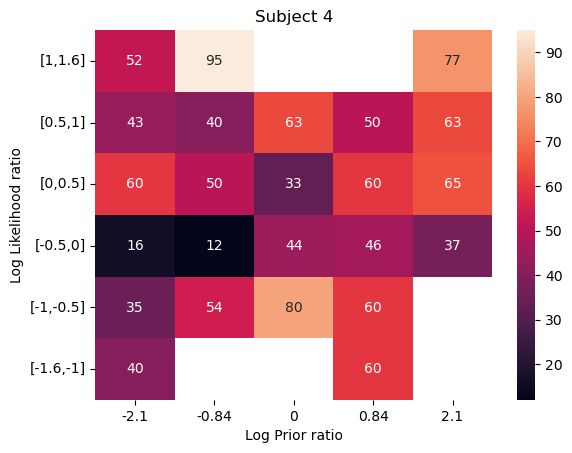

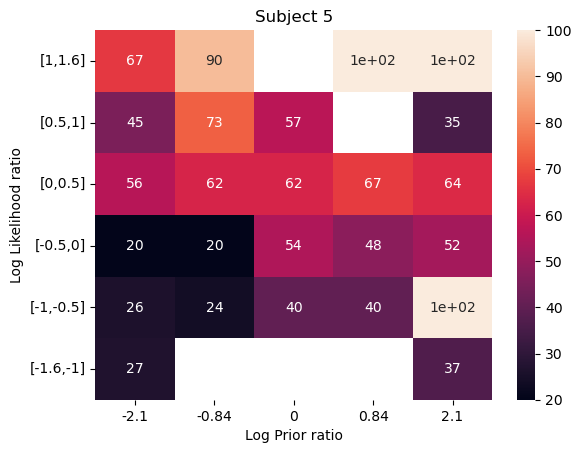

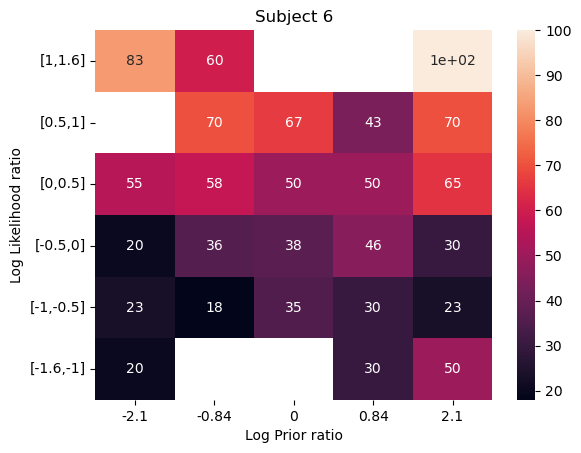

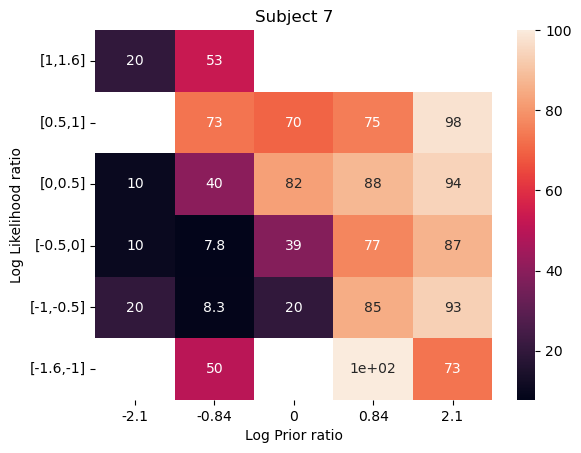

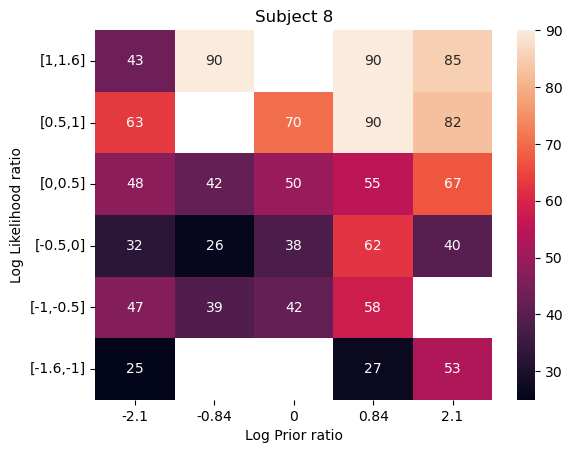

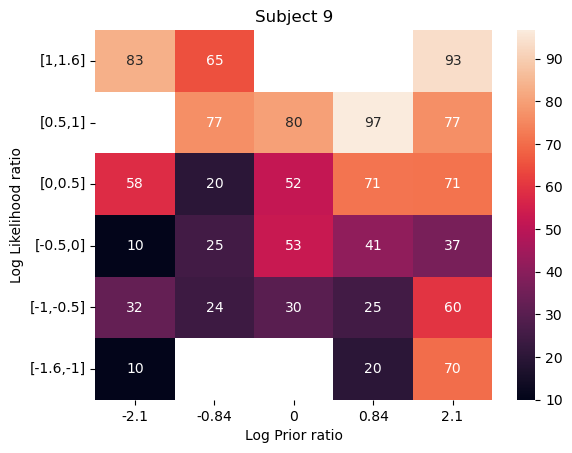

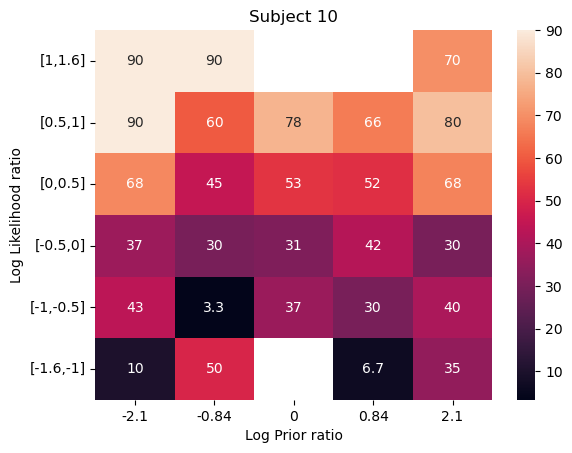

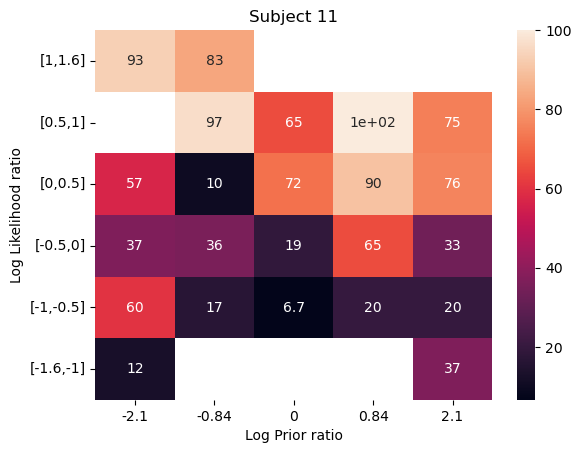

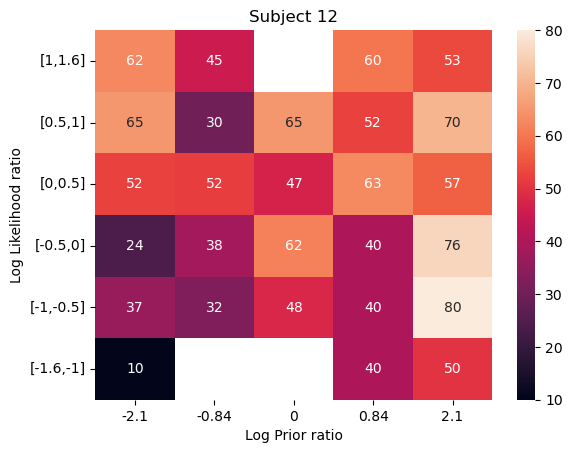

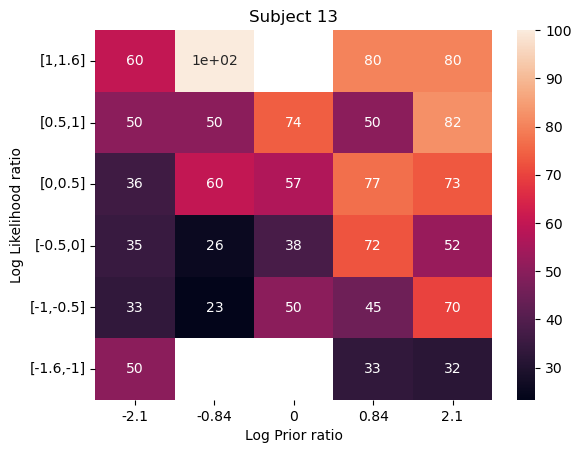

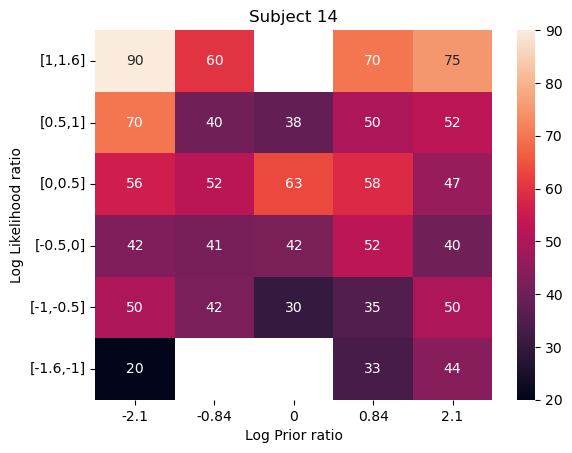

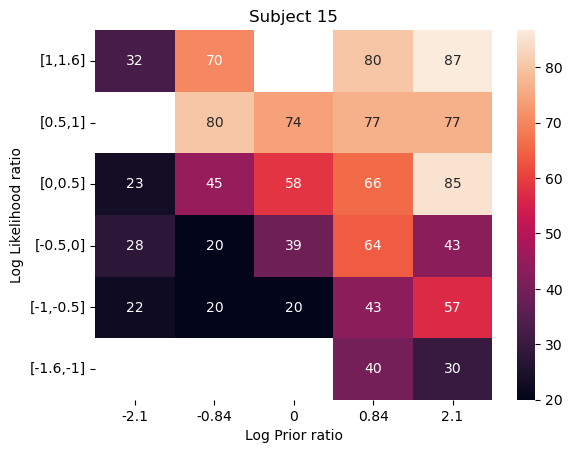

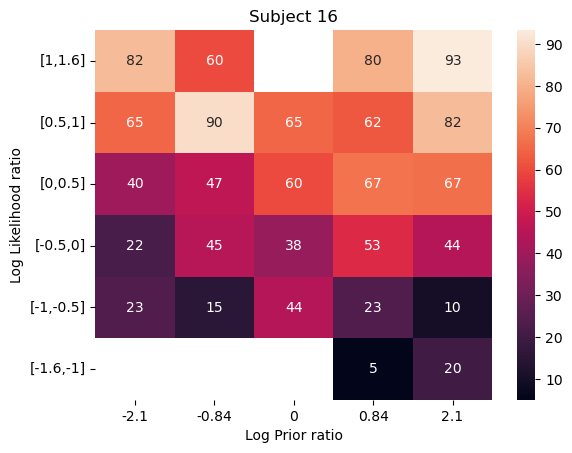

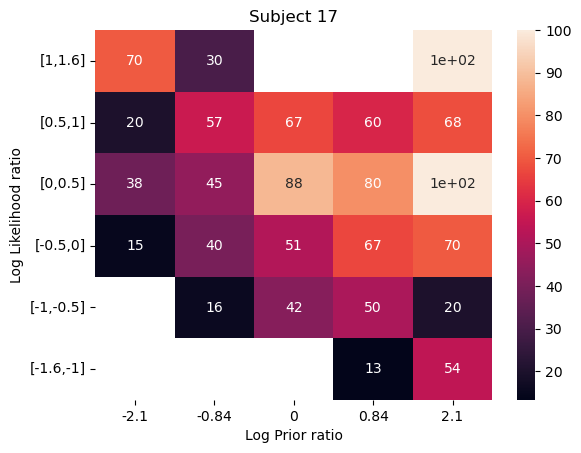

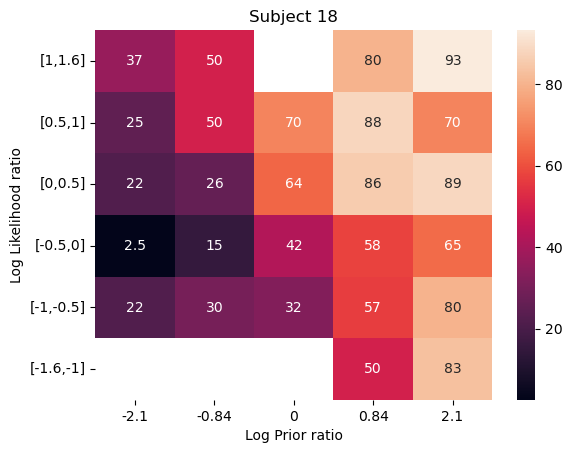

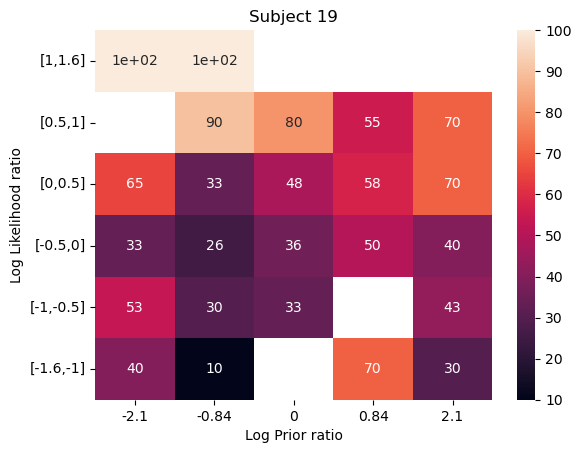

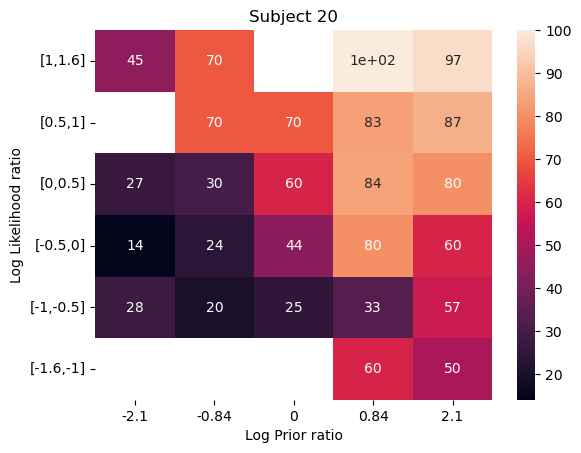

In [ ]:
data['Log_like_ratio_left'] = data.apply(lambda x: np.log(x['correct_image'] / x['false_image']) if x['corloc'] == 1 else np.log(x['false_image'] / x['correct_image']), axis=1)
data['Log like ratio'] = data.apply(lambda x: np.log(x['correct_image'] / x['false_image']), axis=1)
data['Log Prior ratio']  = data.apply(lambda x: np.log(x['prior']/(100-x['prior'])),axis=1)



data.loc[(data['Log_like_ratio_left'] > -1.6) & (data['Log_like_ratio_left'] <= -1), 'divided_Lik'] = -1.5
data.loc[(data['Log_like_ratio_left'] > -1) & (data['Log_like_ratio_left'] <= -0.5), 'divided_Lik'] = -1
data.loc[(data['Log_like_ratio_left'] > -0.5) & (data['Log_like_ratio_left'] <= 0), 'divided_Lik'] = -0.5
data.loc[(data['Log_like_ratio_left'] > 0) & (data['Log_like_ratio_left'] <= 0.5), 'divided_Lik'] = 0
data.loc[(data['Log_like_ratio_left'] > 0.5) & (data['Log_like_ratio_left'] <= 1), 'divided_Lik'] = 0.5
data.loc[(data['Log_like_ratio_left'] > 1) & (data['Log_like_ratio_left'] <= 1.6), 'divided_Lik'] = 1

data.loc[(data['Log_like_ratio_left'] > -1.6) & (data['Log_like_ratio_left'] <= -0.5), 'Seonsory evidence'] = 'Incongruent Image'
data.loc[(data['Log_like_ratio_left'] > -0.5) & (data['Log_like_ratio_left'] <= 0.5), 'Seonsory evidence'] = 'Ambiguous Image'
data.loc[(data['Log_like_ratio_left'] > 0.5) & (data['Log_like_ratio_left'] <= 1.6), 'Seonsory evidence'] = 'Clear Image'

# ALL subjects
data2d = pd.DataFrame(columns=np.unique(data['Log Prior ratio']),index=[-1.5,-1,-0.5,0,0.5,1])

for l_pri in np.unique(data['Log Prior ratio']):
    for l_lik in [-1.5,-1,-0.5,0,0.5,1]:
        temp = data[data['Log Prior ratio']==l_pri]
        if l_lik in temp['divided_Lik'].values:
            temp2 = temp[temp['divided_Lik']==l_lik]
            data2d.loc[l_lik,l_pri] = np.mean(temp2['posterior'])
        else:
            data2d.loc[l_lik,l_pri] = 0

pd.set_option('display.max_row', None)
data2d.replace(0, float('nan'), inplace=True)
ax = sns.heatmap(data2d, annot=True,xticklabels=[-2.1,-0.84,0,0.84,2.1],yticklabels=['[-1.6,-1]','[-1,-0.5]','[-0.5,0]','[0,0.5]','[0.5,1]','[1,1.6]'])
ax.invert_yaxis()
plt.gca().yaxis.set_tick_params(rotation=0)
plt.xlabel('Log Prior ratio')
plt.ylabel('Log Likelihood ratio')
plt.title('All subjects')
plt.show()

# Group
for group in ['scz', 'control']:
    data_group = data[data['group']==group]
    
    data2d = pd.DataFrame(columns=np.unique(data_group['Log Prior ratio']),index=[-1.5,-1,-0.5,0,0.5,1])

    for l_pri in np.unique(data_group['Log Prior ratio']):
        for l_lik in [-1.5,-1,-0.5,0,0.5,1]:
            temp = data_group[data_group['Log Prior ratio']==l_pri]
            if l_lik in temp['divided_Lik'].values:
                temp2 = temp[temp['divided_Lik']==l_lik]
                data2d.loc[l_lik,l_pri] = np.mean(temp2['posterior'])
            else:
                data2d.loc[l_lik,l_pri] = 0
    
    pd.set_option('display.max_row', None)
    data2d.replace(0, float('nan'), inplace=True)
    ax = sns.heatmap(data2d, annot=True,xticklabels=[-2.1,-0.84,0,0.84,2.1],yticklabels=['[-1.6,-1]','[-1,-0.5]','[-0.5,0]','[0,0.5]','[0.5,1]','[1,1.6]'])
    ax.invert_yaxis()
    plt.gca().yaxis.set_tick_params(rotation=0)
    plt.xlabel('Log Prior ratio')
    plt.ylabel('Log Likelihood ratio')
    plt.title(group)
    plt.show()

# Each subject
for number in range(21):
    data_subject = data[data['subject']==number]
    
    data2d = pd.DataFrame(columns=np.unique(data_subject['Log Prior ratio']),index=[-1.5,-1,-0.5,0,0.5,1])

    for l_pri in np.unique(data_group['Log Prior ratio']):
        for l_lik in [-1.5,-1,-0.5,0,0.5,1]:
            temp = data_subject[data_subject['Log Prior ratio']==l_pri]
            if l_lik in temp['divided_Lik'].values:
                temp2 = temp[temp['divided_Lik']==l_lik]
                data2d.loc[l_lik,l_pri] = np.mean(temp2['posterior'])
            else:
                data2d.loc[l_lik,l_pri] = 0
    
    pd.set_option('display.max_row', None)
    data2d.replace(0, float('nan'), inplace=True)
    ax = sns.heatmap(data2d, annot=True,xticklabels=[-2.1,-0.84,0,0.84,2.1],yticklabels=['[-1.6,-1]','[-1,-0.5]','[-0.5,0]','[0,0.5]','[0.5,1]','[1,1.6]'])
    ax.invert_yaxis()
    plt.gca().yaxis.set_tick_params(rotation=0)
    plt.xlabel('Log Prior ratio')
    plt.ylabel('Log Likelihood ratio')
    plt.title(f'Subject {number}')
    plt.show()

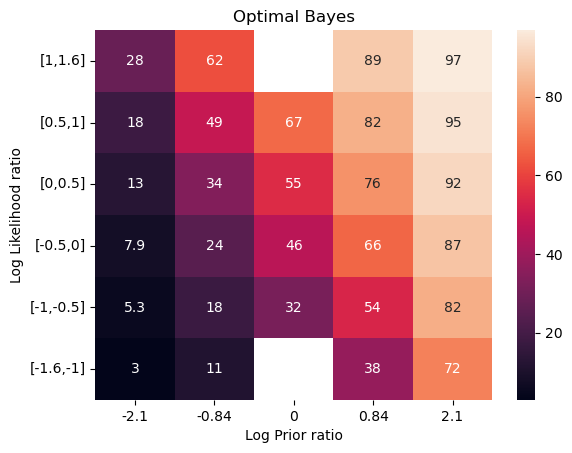

In [ ]:
data_subject = data
data2d = pd.DataFrame(columns=np.unique(data_subject['Log Prior ratio']),index=[-1.5,-1,-0.5,0,0.5,1])

for l_pri in np.unique(data_subject['Log Prior ratio']):
    for l_lik in [-1.5,-1,-0.5,0,0.5,1]:
        temp = data_subject[data_subject['Log Prior ratio']==l_pri]
        if l_lik in temp['divided_Lik'].values:
            
            temp2 = temp[temp['divided_Lik']==l_lik]
            # print(temp2)
            Lc = temp2['Log Prior ratio'] + temp2['Log_like_ratio_left']
            pos = np.exp(Lc)/(1+np.exp(Lc))
            data2d.loc[l_lik,l_pri] = np.mean(pos)*100
        else:
            data2d.loc[l_lik,l_pri] = 0

pd.set_option('display.max_row', None)
data2d.replace(0, float('nan'), inplace=True)
ax = sns.heatmap(data2d, annot=True,xticklabels=[-2.1,-0.84,0,0.84,2.1],yticklabels=['[-1.6,-1]','[-1,-0.5]','[-0.5,0]','[0,0.5]','[0.5,1]','[1,1.6]'])
ax.invert_yaxis()
plt.gca().yaxis.set_tick_params(rotation=0)
plt.xlabel('Log Prior ratio')
plt.ylabel('Log Likelihood ratio')
plt.title('Optimal Bayes')
plt.show()

/var/folders/cz/nzzq84dn7238znf9n03jnb780000gp/T/ipykernel_9241/396102493.py:6: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(x='prior', y='posterior', data=data, hue='group', dodge=True, kind='point', capsize=0.2, join=False)


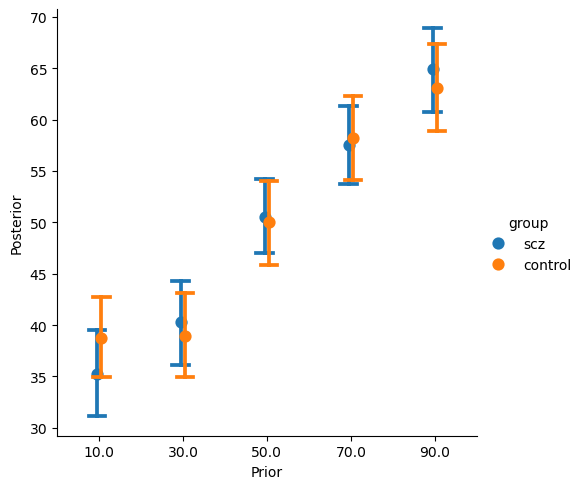

In [ ]:
# The effect of prior on posterior confidence
sns.catplot(x='prior', y='posterior', data=data, hue='group', dodge=True, kind='point', capsize=0.2, join=False)
plt.xlabel('Prior')
plt.ylabel('Posterior')
plt.show()

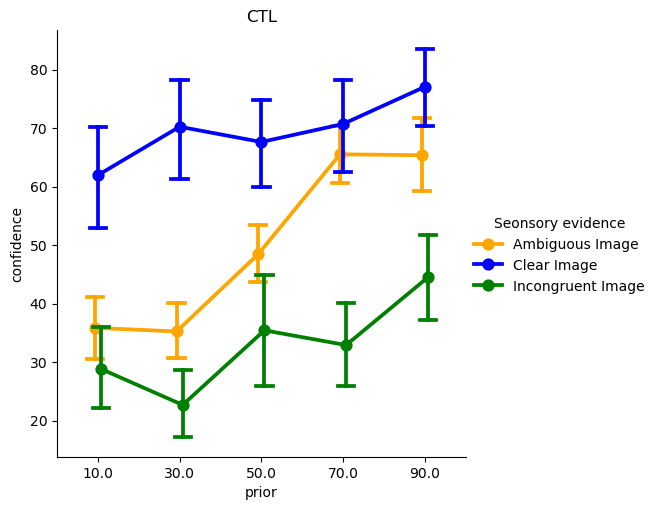

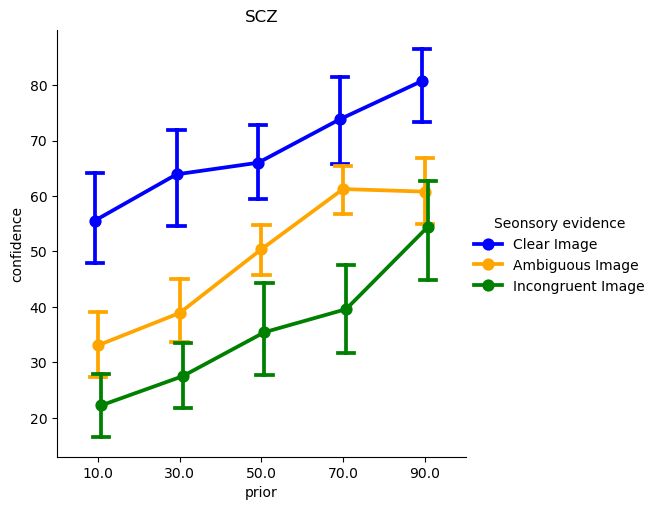

/var/folders/cz/nzzq84dn7238znf9n03jnb780000gp/T/ipykernel_9241/3698306443.py:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  seaborn.catplot(x='prior',y='posterior',data=data,hue='group',dodge=True,kind='point',capsize=0.2, join=False)


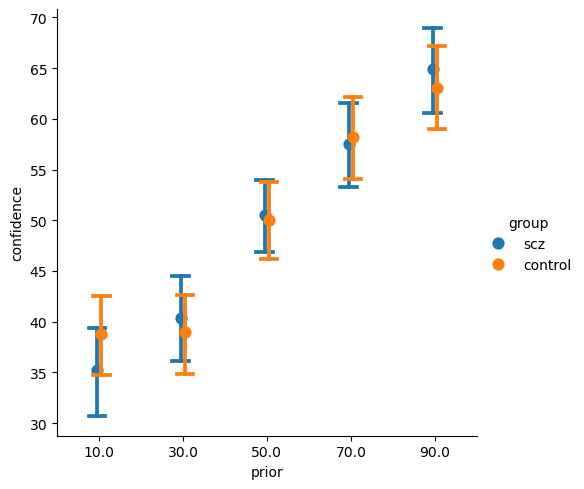

In [ ]:
data_con = data[data['group']=='control']
data_scz = data[data['group']=='scz']
palette = {'Clear Image': 'blue', 'Ambiguous Image': 'orange', 'Incongruent Image': 'green'}

sns.catplot(x='prior',y='posterior',data=data_con,hue='Seonsory evidence',dodge=True,kind='point',capsize=0.2,palette=palette)
plt.title('CTL')
plt.ylabel('confidence')
plt.show()
sns.catplot(x='prior',y='posterior',data=data_scz,hue='Seonsory evidence',dodge=True,kind='point',capsize=0.2,palette=palette)
plt.title('SCZ')
plt.ylabel('confidence')
plt.show()

sns.catplot(x='prior',y='posterior',data=data,hue='group',dodge=True,kind='point',capsize=0.2, join=False)
plt.ylabel('confidence')
plt.show()

<Axes: xlabel='prior', ylabel='posterior'>

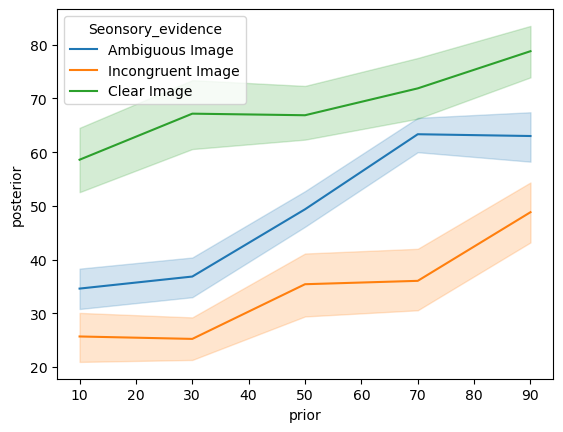

In [ ]:
# sns.lineplot(x='prior', y='posterior', hue='Seonsory_evidence', data=data[data['group']=='scz'])
# plt.title('schizophrenia')
# plt.show()
# sns.lineplot(x='prior', y='posterior', hue='Seonsory_evidence', data=data[data['group']=='control'])
# plt.title('control')
sns.lineplot(x='prior', y='posterior', hue='Seonsory_evidence', data=data)


/var/folders/cz/nzzq84dn7238znf9n03jnb780000gp/T/ipykernel_9241/1202319503.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


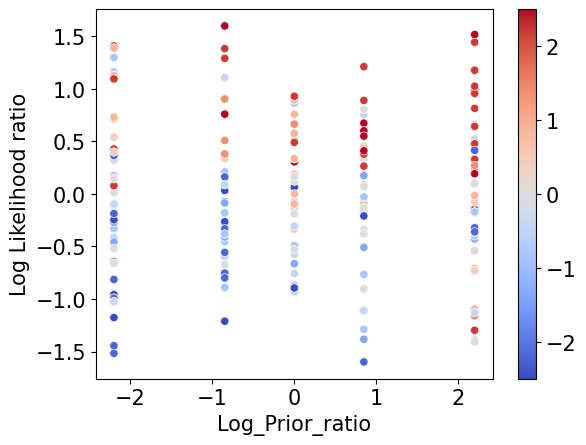

/var/folders/cz/nzzq84dn7238znf9n03jnb780000gp/T/ipykernel_9241/1202319503.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


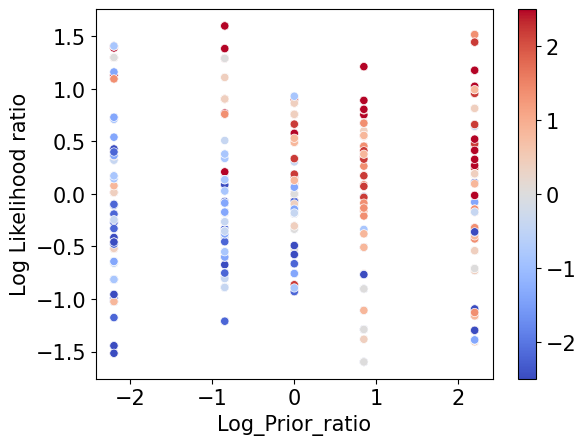

In [ ]:
small_constant = 1
posterior = data['posterior']

# Avoid division by zero or log of zero by adjusting edge cases
adjusted_posterior = np.where(posterior == 0, posterior + small_constant, posterior)
adjusted_posterior = np.where(posterior == 100, posterior - small_constant, adjusted_posterior)

data['Log_posterior'] = np.log(adjusted_posterior / (100-adjusted_posterior))

plt.rcParams.update({'font.size': 15})
color_bar=2.5
for group in ['scz', 'control']:
    data_group = data[data['group']==group]
    scatter = sns.scatterplot(
        data=data_group, 
        x="Log_Prior_ratio", 
        # y="Log like ratio",
        y='Log_like_ratio_left',
        hue="Log_posterior",  # Use numerical column for color mapping
        palette="coolwarm",  # Use a perceptually uniform colormap
        hue_norm=(-color_bar, color_bar),  # Normalize colors
        # edgecolor=None,
        legend=False
    )
    
    plt.ylabel('Log Likelihood ratio')
    
    norm = plt.Normalize(-color_bar, color_bar)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    # cbar.set_label("Average Posterior per Image")
    
    plt.show()